In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow import keras

In [44]:
df.head(5)

,Arr_ID,Unit_ID,FIR_ID,NC_ID,NC_No,Crime_No,CCIS_Crime_No,CCIS_SlNo,Person_Name,Person_No,...,Brief_Facts,dedt_upd,Months,Days,ishabitualoffender,Alias,EscfromCustody,Card_opening_Officer,AccusedStatus,Person_BailDetails
0,2014000001,399,2014000001,NaN,NaN,10446039920140001,NaN,NaN,SMT. KASTURBAI,NaN,...,NaN,4/26/2019 19:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014000001,592,2014000001,NaN,NaN,10451059220140001,NaN,NaN,PRADEEP S D,NaN,...,NaN,4/26/2019 19:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014000001,709,2014000001,NaN,NaN,10454070920140001,NaN,NaN,MOHMEDSHAIKH S/O SHAIKH HYDRA,NaN,...,NaN,10/30/2019 10:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014000001,844,2014000001,NaN,NaN,10458084420140001,NaN,NaN,ANILKUMAR,NaN,...,NaN,4/26/2019 19:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014000001,871,2014000001,NaN,NaN,10458087120140001,NaN,NaN,Syed Hinayath S/o Syed Razak,NaN,...,NaN,11/7/2019 18:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.columns

Index([u'Person_ID', u'Person_Name', u'Father_Name', u'Unit_ID', u'Address1',
       u'Address2', u'Crime_No', u'City_ID', u'State_ID', u'Nationality_iD',
       u'Phone', u'Mobile_No', u'Licence_Number', u'Issued_By', u'Valid_Upto',
       u'Fax', u'EMail', u'zip', u'sex', u'D_O_B', u'Age', u'Qualification',
       u'Occupation_ID', u'Person_Type', u'UserID', u'Remarks',
       u'Modified_Unit_ID', u'Action_Flag', u'Sync_Id', u'Sync_Id_Old',
       u'Licence_issued_by', u'DEDT', u'Petitioner_Name', u'Respondent_Name',
       u'Petitioner_Address', u'Respondent_Address', u'MVC_Number',
       u'Date_Claiming_Petition', u'Date_Preli_Hearing_Parties',
       u'IsCompany_Paid', u'Company_PaidYes_Amount', u'Company_PaidNo_Reason',
       u'IsParties_Appear', u'Parties_Appear_No_Reason',
       u'IsParties_Appear_Yes', u'Parties_Appear_CouncilAddress',
       u'IsInsCom_Disputed_Liability'],
      dtype='object')

In [12]:
new_df = pd.read_csv('MorthDataSets/TBL_TR_Person_Details.csv', usecols= ['Address1', 'Address2','sex','Age','Qualification','DEDT'])

In [13]:
new_df

,Address1,Address2,sex,Age,Qualification,DEDT
0,Sri Rama Nagara,HN Pura Road Hassan Tq,1,29,0,1/21/2014 10:55
1,Kammath Marikunte Village,Challakere taluk,1,35,0,7/15/2014 9:19
2,NAITISAVAR,KARWAR,1,29,0,3/23/2014 19:55
3,GOKAK,GOKAK T.Q,2,58,0,1/20/2014 13:01
4,NAITISAVAR,KARWAR,1,40,0,3/23/2014 19:55
5,AT MANTHURGA,TQ KAHNAPUR,1,46,0,2/26/2014 18:53
6,PALGUNI BANAKAL,MUDIGERE TQ,1,55,6574,9/1/2014 19:58
7,Gujjenahally,Kadur Tq,2,48,0,7/30/2014 16:37
8,Chikkabadaradinni Village,Manvi Taluk,1,18,0,2/3/2014 12:32
9,Gujjenahally,Kadur Tq,2,50,0,7/30/2014 16:37


In [14]:
new_df.isna().sum()

Address1           283
Address2         26647
sex                  0
Age                  0
Qualification        0
DEDT                 0
dtype: int64

In [17]:
new_df.dropna(inplace=True)

In [18]:
new_df

,Address1,Address2,sex,Age,Qualification,DEDT
0,Sri Rama Nagara,HN Pura Road Hassan Tq,1,29,0,1/21/2014 10:55
1,Kammath Marikunte Village,Challakere taluk,1,35,0,7/15/2014 9:19
2,NAITISAVAR,KARWAR,1,29,0,3/23/2014 19:55
3,GOKAK,GOKAK T.Q,2,58,0,1/20/2014 13:01
4,NAITISAVAR,KARWAR,1,40,0,3/23/2014 19:55
5,AT MANTHURGA,TQ KAHNAPUR,1,46,0,2/26/2014 18:53
6,PALGUNI BANAKAL,MUDIGERE TQ,1,55,6574,9/1/2014 19:58
7,Gujjenahally,Kadur Tq,2,48,0,7/30/2014 16:37
8,Chikkabadaradinni Village,Manvi Taluk,1,18,0,2/3/2014 12:32
9,Gujjenahally,Kadur Tq,2,50,0,7/30/2014 16:37


In [21]:
new_df['Qualification'].describe()
from ast import literal_eval as lit

In [24]:
new_df['Time'] = new_df['DEDT'].apply(lambda x : str((x)))

In [29]:
new_df['Time']=new_df['Time'].apply(lambda x : x[-5:])

In [31]:
new_df.drop(['DEDT'], axis=1, inplace=True)

In [33]:
new_df.drop_duplicates(subset=['Address1','Address2'], inplace=True)

In [35]:
new_df

,Address1,Address2,sex,Age,Qualification,Time
0,Sri Rama Nagara,HN Pura Road Hassan Tq,1,29,0,10:55
1,Kammath Marikunte Village,Challakere taluk,1,35,0,9:19
2,NAITISAVAR,KARWAR,1,29,0,19:55
3,GOKAK,GOKAK T.Q,2,58,0,13:01
5,AT MANTHURGA,TQ KAHNAPUR,1,46,0,18:53
6,PALGUNI BANAKAL,MUDIGERE TQ,1,55,6574,19:58
7,Gujjenahally,Kadur Tq,2,48,0,16:37
8,Chikkabadaradinni Village,Manvi Taluk,1,18,0,12:32
11,KOLURU,VILLEGE,1,4,0,18:55
12,KELAGURU VILLAGE,ALDURU HOBLI,1,70,0,19:19


In [38]:
new_df['Address1']= new_df['Address1'].apply(lambda x : str(x.lower()))
new_df['Address2']=new_df['Address2'].apply(lambda x : str(x.lower()))

In [39]:
new_df

,Address1,Address2,sex,Age,Qualification,Time
0,sri rama nagara,hn pura road hassan tq,1,29,0,10:55
1,kammath marikunte village,challakere taluk,1,35,0,9:19
2,naitisavar,karwar,1,29,0,19:55
3,gokak,gokak t.q,2,58,0,13:01
5,at manthurga,tq kahnapur,1,46,0,18:53
6,palguni banakal,mudigere tq,1,55,6574,19:58
7,gujjenahally,kadur tq,2,48,0,16:37
8,chikkabadaradinni village,manvi taluk,1,18,0,12:32
11,koluru,villege,1,4,0,18:55
12,kelaguru village,alduru hobli,1,70,0,19:19


In [41]:
new_df.corr()

,sex,Age,Qualification
sex,1.000000,0.043218,-0.005116
Age,0.043218,1.000000,-0.020214
Qualification,-0.005116,-0.020214,1.000000


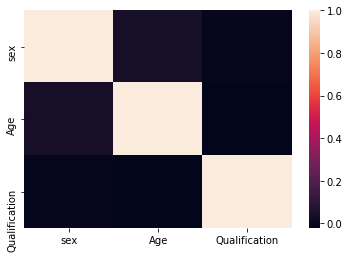

In [42]:
sns.heatmap(new_df.corr())

In [43]:
df = pd.read_csv('MorthDataSets/tbl_CR_Arr_Person_Details.csv')

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (26,52,55,129,130,133,134) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [47]:
df.corr()

,Arr_ID,Unit_ID,FIR_ID,NC_ID,NC_No,Crime_No,CCIS_Crime_No,CCIS_SlNo,Person_No,PersonType,...,Sync_Id_Old,sort_order,Brief_Facts,Months,Days,ishabitualoffender,EscfromCustody,Card_opening_Officer,AccusedStatus,Person_BailDetails
Arr_ID,1.000000,0.068853,0.994801,NaN,NaN,0.015927,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.014877,-0.022105,NaN,NaN,NaN,NaN,NaN
Unit_ID,0.068853,1.000000,0.068733,NaN,NaN,0.024893,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.002772,0.004422,NaN,NaN,NaN,NaN,NaN
FIR_ID,0.994801,0.068733,1.000000,NaN,NaN,0.017150,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.014752,-0.022032,NaN,NaN,NaN,NaN,NaN
NC_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NC_No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crime_No,0.015927,0.024893,0.017150,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000421,-0.007493,NaN,NaN,NaN,NaN,NaN
CCIS_Crime_No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CCIS_SlNo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Person_No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PersonType,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
mat = df.corr()

In [52]:
mat

,Arr_ID,Unit_ID,FIR_ID,NC_ID,NC_No,Crime_No,CCIS_Crime_No,CCIS_SlNo,Person_No,PersonType,...,Sync_Id_Old,sort_order,Brief_Facts,Months,Days,ishabitualoffender,EscfromCustody,Card_opening_Officer,AccusedStatus,Person_BailDetails
Arr_ID,1.000000,0.068853,0.994801,NaN,NaN,0.015927,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.014877,-0.022105,NaN,NaN,NaN,NaN,NaN
Unit_ID,0.068853,1.000000,0.068733,NaN,NaN,0.024893,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.002772,0.004422,NaN,NaN,NaN,NaN,NaN
FIR_ID,0.994801,0.068733,1.000000,NaN,NaN,0.017150,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.014752,-0.022032,NaN,NaN,NaN,NaN,NaN
NC_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NC_No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crime_No,0.015927,0.024893,0.017150,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000421,-0.007493,NaN,NaN,NaN,NaN,NaN
CCIS_Crime_No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CCIS_SlNo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Person_No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PersonType,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
